# SRlite evaluation of land cover classification results in Senegal
Classification results for SRlite vs TOA  

recall = TP/(TP+FN)  
overall accuracy = sum(true positives)/sum(TP + TN + FP + FN)  
accuracy = average(other recall, crop recall, tree recall)

#### conda-r-env-3.6.3

In [1]:
library(tidyverse)
library(reshape2)
library(sf)

#install.packages("remotes")
#library(remotes)
#remotes::install_github('https://github.com/ropensci/rnaturalearthhires')
library(rnaturalearthhires)
library(rnaturalearth)

library(patchwork)
library(fs)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.4.4     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.1.3     ✔ stringr 1.5.1
✔ readr   1.4.0     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



ERROR: Error in library(sf): there is no package called ‘sf’


In [2]:
library(viridis)
library(scales)
library(tools)
library(patchwork)

Loading required package: viridisLite

Attaching package: ‘scales’

The following object is masked from ‘package:viridis’:

    viridis_pal

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



In [3]:
DIR_LCLUC = '/explore/nobackup/people/pmontesa/userfs02/projects/LULC_Senegal'
OUTDIR    = '/explore/nobackup/people/pmontesa/userfs02/projects/ilab/srlite_igarss'

In [4]:
footprint_gdf_list = list()
for(ZONE in c('CAS','SRV','ETZ')){ 
    footprint_gdf_list[[ZONE]] = st_read(paste0(DIR_LCLUC, '/footprints_Senegal_',ZONE,'.gpkg')) %>% 
                    separate(file, sep='_', into=c('sensor', 'date','type','catid'), remove=FALSE) %>%
                    separate(catid, sep='-', into=c('catid'), remove=TRUE)
}    
footprint_gdf = do.call('rbind', footprint_gdf_list)

Reading layer `M1BS' from data source `/panfs/ccds02/nobackup/people/pmontesa/userfs02/projects/LULC_Senegal/footprints_Senegal_CAS.gpkg' using driver `GPKG'
Simple feature collection with 711 features and 5 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -16.95264 ymin: 12.15666 xmax: -13.26952 ymax: 13.79647
Geodetic CRS:  WGS 84


Warning message:
“Expected 1 pieces. Additional pieces discarded in 711 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

Reading layer `M1BS' from data source `/panfs/ccds02/nobackup/people/pmontesa/userfs02/projects/LULC_Senegal/footprints_Senegal_SRV.gpkg' using driver `GPKG'
Simple feature collection with 714 features and 5 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -16.69473 ymin: 14.17414 xmax: -11.96171 ymax: 16.84412
Geodetic CRS:  WGS 84


Warning message:
“Expected 1 pieces. Additional pieces discarded in 714 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

Reading layer `M1BS' from data source `/panfs/ccds02/nobackup/people/pmontesa/userfs02/projects/LULC_Senegal/footprints_Senegal_ETZ.gpkg' using driver `GPKG'
Simple feature collection with 611 features and 5 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -15.6006 ymin: 13.14716 xmax: -12.19323 ymax: 15.81033
Geodetic CRS:  WGS 84


Warning message:
“Expected 1 pieces. Additional pieces discarded in 611 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

In [5]:
tail(footprint_gdf)

Warning message in fun(libname, pkgname):
“rgeos: versions of GEOS runtime 3.9.1-CAPI-1.14.2
and GEOS at installation 3.9.1dev-CAPI-1.14.1differ”Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson
Warning message:
“multiple methods tables found for ‘elide’”

,footprint_name,path,file,sensor,date,type,catid,area_km2,area_ha,geom
ETZ.606,NA,/explore/nobackup/projects/3sl/data/VHR/ETZ/M1BS,WV03_20150313_M1BS_1040010008C41200-toa.tif,WV03,20150313,M1BS,1040010008C41200,1210.9390,121093.90,POLYGON ((-14.98345 14.9859...
ETZ.607,NA,/explore/nobackup/projects/3sl/data/VHR/ETZ/M1BS,WV03_20150325_M1BS_104001000947FE00-toa.tif,WV03,20150325,M1BS,104001000947FE00,737.1043,73710.43,POLYGON ((-14.20284 13.5353...
ETZ.608,NA,/explore/nobackup/projects/3sl/data/VHR/ETZ/M1BS,WV02_20200417_M1BS_10300100A1C80A00-toa.tif,WV02,20200417,M1BS,10300100A1C80A00,1997.6784,199767.84,POLYGON ((-13.11065 13.9732...
ETZ.609,NA,/explore/nobackup/projects/3sl/data/VHR/ETZ/M1BS,WV03_20181214_M1BS_1040010043D20400-toa.tif,WV03,20181214,M1BS,1040010043D20400,1892.3893,189238.93,POLYGON ((-14.78896 13.9692...
ETZ.610,NA,/explore/nobackup/projects/3sl/data/VHR/ETZ/M1BS,WV02_20191122_M1BS_103001009E687000-toa.tif,WV02,20191122,M1BS,103001009E687000,1051.0711,105107.11,POLYGON ((-13.04669 14.4658...
ETZ.611,NA,/explore/nobackup/projects/3sl/data/VHR/ETZ/M1BS,WV03_20200709_M1BS_104001005DB89F00-toa.tif,WV03,20200709,M1BS,104001005DB89F00,1000.4081,100040.81,POLYGON ((-15.10703 14.9845...


In [6]:
footprint_tappan = st_read(paste0(DIR_LCLUC,'/footprint_tappan.gpkg'))

Reading layer `footprint' from data source `/panfs/ccds02/nobackup/people/pmontesa/userfs02/projects/LULC_Senegal/footprint_tappan.gpkg' using driver `GPKG'
Simple feature collection with 456 features and 3 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -16.50234 ymin: 12.73738 xmax: -12.71149 ymax: 16.55282
Geodetic CRS:  WGS 84


In [7]:
smry_footprint_tappan = footprint_tappan %>% group_by(tappan) %>%
    dplyr::summarize(cnt_vhr = n())

although coordinates are longitude/latitude, st_union assumes that they are planar
although coordinates are longitude/latitude, st_union assumes that they are planar
although coordinates are longitude/latitude, st_union assumes that they are planar
although coordinates are longitude/latitude, st_union assumes that they are planar
although coordinates are longitude/latitude, st_union assumes that they are planar
although coordinates are longitude/latitude, st_union assumes that they are planar
although coordinates are longitude/latitude, st_union assumes that they are planar
although coordinates are longitude/latitude, st_union assumes that they are planar
although coordinates are longitude/latitude, st_union assumes that they are planar
although coordinates are longitude/latitude, st_union assumes that they are planar
although coordinates are longitude/latitude, st_union assumes that they are planar
although coordinates are longitude/latitude, st_union assumes that they are planar
alth

In [8]:
ggplot(biogeo_regions_senegal) + geom_sf()

ERROR: Error in ggplot(biogeo_regions_senegal): object 'biogeo_regions_senegal' not found


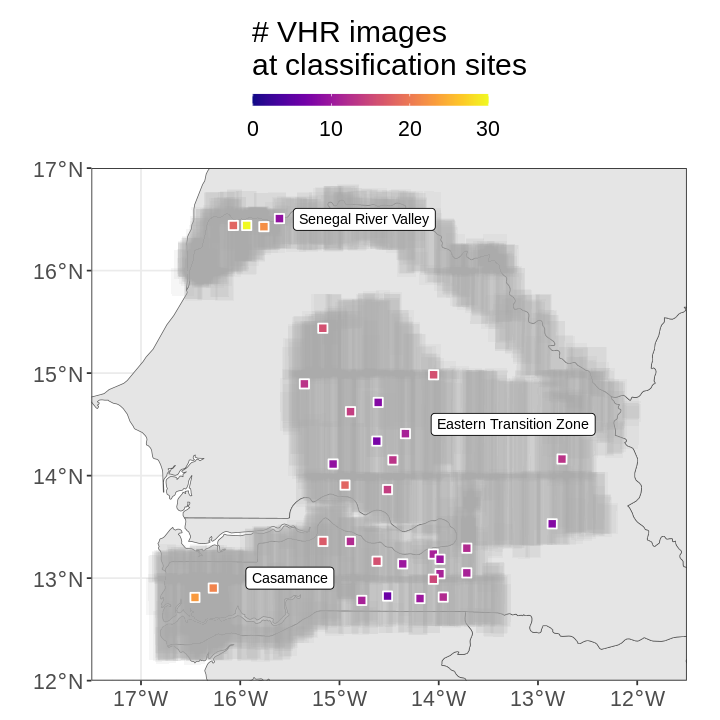

In [23]:
options(repr.plot.width = 6, repr.plot.height = 6)

worldmap = ne_countries(scale = 10, returnclass = 'sf')

biogeo_regions_senegal <- data.frame(name = c("Senegal River Valley", "Casamance", "Eastern Transition Zone"),
                     x = c(-14.75, -15.5, -13.25),
                     y = c(16.5, 13, 14.5)
                     ) %>% 
                      st_as_sf(coords = c("x", "y"), crs = 4326) 

map_vhr = ggplot() + 
    geom_sf(data=worldmap) +
    geom_sf(data=footprint_gdf, alpha=0.1, size=0, fill='darkgray', color=NA) + 
    theme_bw() +
    theme(text = element_text(size=16), legend.position = c(0.9, 0.85) )+
    theme(legend.background = element_rect(colour = 'black', fill = 'white', linetype='solid')) +
    geom_sf(data=smry_footprint_tappan, aes(fill=cnt_vhr), color='white', lwd=0.5) + 
    geom_sf_label(data=biogeo_regions_senegal, aes(label=name), size=3) + 
    #scale_fill_viridis_d(option = 'turbo', name='Sensor') +
    #scale_fill_distiller(palette='Reds', direction=1, name='# VHR images') +
    coord_sf(xlim = c(-17.5, -11.5), ylim = c(12, 17), expand = FALSE)+
    scale_fill_gradientn(limits = c(0,30), breaks = seq(0,30,10), colours = plasma(10), oob=squish , name='# VHR images\nat classification sites') +
    theme(legend.position="top",
          legend.title = element_text(size=18),
          legend.background = element_rect(color='white'),
           #      legend.direction  = 'vertical',
          legend.key.width  = unit(1.0, "cm"),
          legend.key.height = unit(.25, "cm")  ) +
    guides(fill=guide_colourbar(title.position = "top", label.position = "bottom", legend.position='horizontal', 
                                 keywidth = unit(.5, "cm"), keyheight = unit(.25, "cm")))+
labs(x=NULL, y=NULL)

    

map_vhr

In [10]:
dim(footprint_gdf)

[1] 2036   10

In [11]:
dim(footprint_tappan)

[1] 456   4

In [12]:
df = read.csv('/home/pmontesa/mfrost2/projects/srlite/CNN_model/data/accuracy_exp4.csv', stringsAsFactors=TRUE)
names(df)[names(df) == 'accuracy'] <- 'overall.recall'

In [13]:
df$n_points

[1] 108 108 108 106 106 106 106 106 106  88  87  87  67  67  67  66  68 108
 [19] 109  53  52  67  66  71  75  93  93 106 106 105  92  93  92  98  98  97
 [37]  83  79  79  81  81  81  81  81  84  81  69  69 103 103  42  39  99 105
 [55] 122 122  97  97 103 103  90  90  91  91  49  50 105 104 106 106  97  97
 [73]  79  77 162 162  80  78  69  69 111 111  64  64  84  83 125 124 110 109
 [91]  60  59 103 103 105 104  92  92 138 138  65  64 111 106 127 127  37  50
[109] 104  80  85  74  55  61  43  64  69  36  61  73 104 104  30  30  56  56
[127]  28  28  16  16 116 117  62  62  11  11 111 111  79  79 123 123 100  97
[145] 129 129  85  84 123 123 130 130 134 134 126 126 132 132 118 118 134 134
[163] 144 144 116 116

In [14]:
dfm = melt(df %>% dplyr::select(-c(X, index, 'other.other','other.tree','other.crop','tree.other','tree.tree','tree.crop','crop.other','crop.tree','crop.crop')), id.vars=c('filename', 'exp', 'scene', 'tappan','n_points'))

In [15]:
dfm2 = dfm %>% 
    separate(col='variable', sep="\\.", c('type','var2','var3'), extra='merge', convert=TRUE) %>%
    unite('stat', c('var2','var3'), sep = "\n", remove = TRUE, na.rm = TRUE)

Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 1328 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

In [16]:
str(dfm2)

'data.frame':	2324 obs. of  8 variables:
 $ filename: Factor w/ 85 levels "Tappan01_WV02_20110430_M1BS_103001000A27E100_data",..: 1 1 1 2 2 2 3 3 3 4 ...
 $ exp     : Factor w/ 1 level "experiment4": 1 1 1 1 1 1 1 1 1 1 ...
 $ scene   : Factor w/ 3 levels "ard-clean","srlite-clean-v2",..: 1 2 3 1 2 3 1 2 3 1 ...
 $ tappan  : Factor w/ 20 levels "Tappan01","Tappan02",..: 1 1 1 1 1 1 1 1 1 2 ...
 $ n_points: int  108 108 108 106 106 106 106 106 106 88 ...
 $ type    : chr  "overall" "overall" "overall" "overall" ...
 $ stat    : chr  "accuracy" "accuracy" "accuracy" "accuracy" ...
 $ value   : num  0.88 0.87 0.88 0.821 0.83 ...


In [17]:
scene_labels = c(expression(italic(SR[reference])), expression(italic(SR[VHR])), expression(italic(TOA[VHR])) )
scene_levels = c('SR[reference]','SR[VHR]', 'TOA[VHR]')
levels(dfm2$scene) = scene_levels

In [18]:
dfm2$type  <- factor(dfm2$type, levels = c( "crop", "tree", "other", "overall"))
dfm2$stat  <- factor(dfm2$stat, levels = c('user\naccuracy', 'producer\naccuracy','recall','accuracy','precision'))
dfm2$scene <- factor(dfm2$scene, levels = scene_levels)

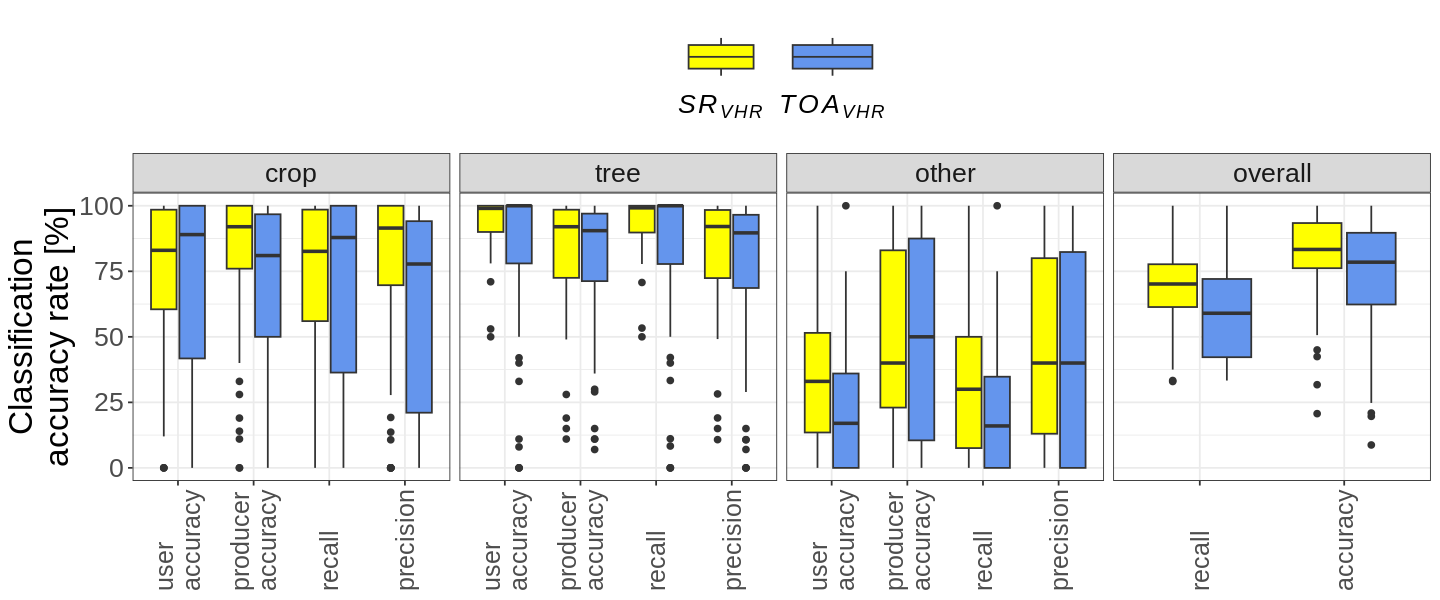

In [20]:
options(repr.plot.height = 5, repr.plot.width = 12, warn=-1)

p_boxplots = dfm2 %>% 
    #filter(type == 'crop' | type == 'tree') %>%
    filter(scene != 'SR[reference]' ) %>%
    droplevels() %>%
    ggplot(aes(y=value*100, x=stat, fill=scene))+
            scale_fill_manual(values=c('yellow','cornflowerblue'), name=NULL, labels=scene_labels[2:3]) +
            #geom_violin() +
            geom_boxplot() +
            facet_wrap(.~type, ncol=5, scales='free_x') +
            coord_cartesian(ylim=c(0,100)) +
            theme_bw() +
            theme(text=element_text(size=20), 
                  axis.text.x=element_text(size=15, angle=90 ,hjust=0,vjust=0.5),
                 legend.text.align = 0, 
                 legend.position="top",
          legend.title = element_text(size=18),
          legend.background = element_rect(color='white') ) +
            guides(fill=guide_legend(title.position = "top", label.position = "bottom", legend.position='horizontal'
                                     ,keywidth = unit(.125, "cm"), keyheight = unit(1, "cm")
                                    )
                  ) +
            labs(x=NULL, y='Classification\naccuracy rate [%]')

p_boxplots

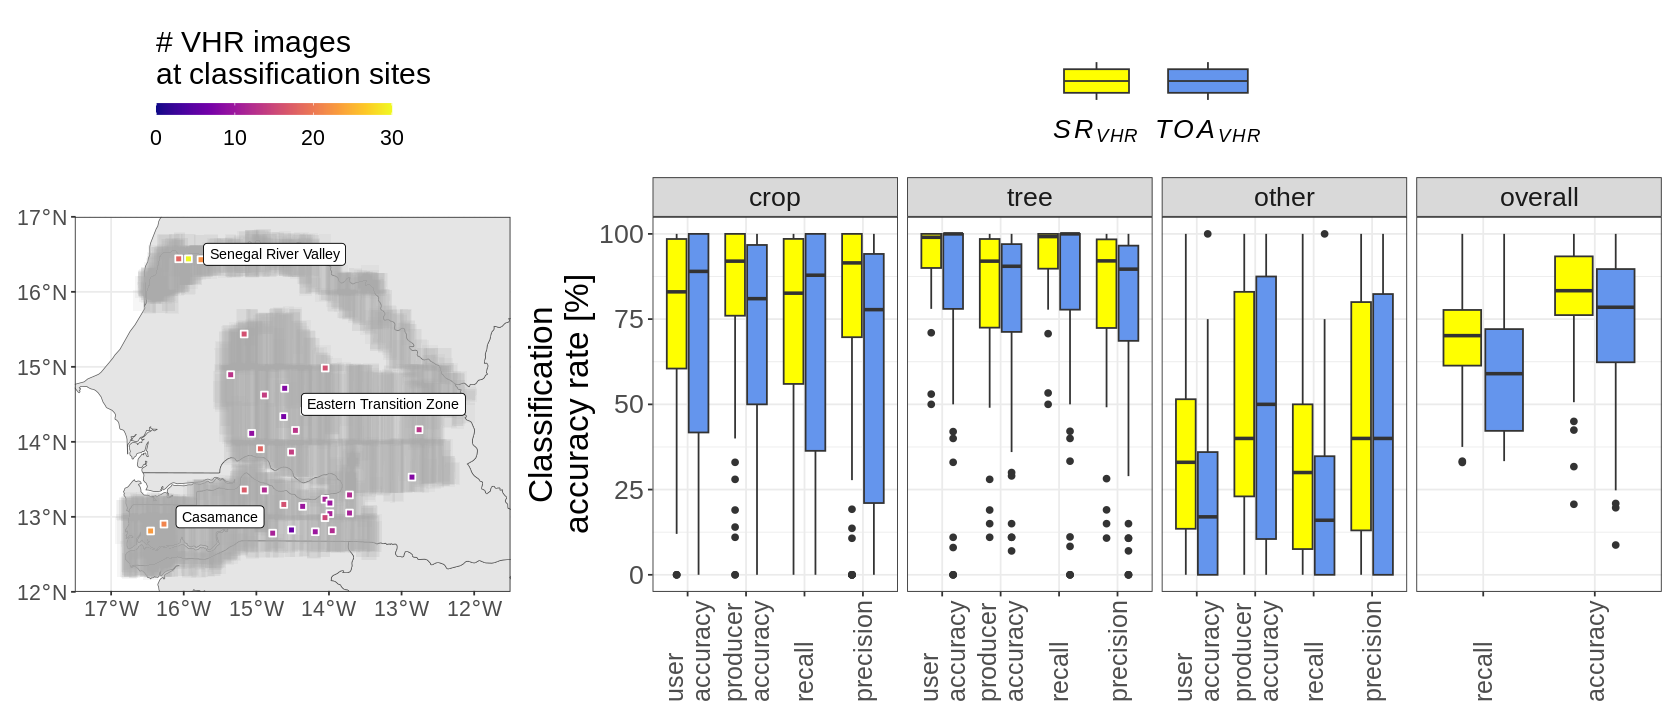

In [24]:
options(repr.plot.height = 6, repr.plot.width = 14, warn=-1)

figure = map_vhr | p_boxplots
figure

In [25]:
DATA_NAME_STEM = "classification_results_senegal"
EXPORT_TIME_STR = format(Sys.time(), "_%Y%m%d")

for(OUT_TYPE in c('png', 'tiff')){
    fig_fn = path(OUTDIR, paste0("/plots/figure_",DATA_NAME_STEM,"_", EXPORT_TIME_STR,".", OUT_TYPE))
    print(fig_fn)
    ggsave(plot = figure,
           file = fig_fn,
           device = OUT_TYPE, dpi = 400, height = 6, width = 14)
}

/explore/nobackup/people/pmontesa/userfs02/projects/ilab/srlite_igarss/plots/figure_classification_results_senegal__20240415.png
/explore/nobackup/people/pmontesa/userfs02/projects/ilab/srlite_igarss/plots/figure_classification_results_senegal__20240415.tiff


## LC Change Classification Rate: SR vs TOA

In [23]:
outdir_jordan = '/explore/nobackup/people/jacaraba/projects/SRLite/Paper'

In [24]:
#results_sr = st_read(paste0(outdir_jordan, '/SRLite_time_series_results_val_eCAS-wCAS-ETZ-otcb-80_repeat3_251-0.33.gpkg'))
results_sr = st_read(paste0(outdir_jordan, '/time_series_SRLite_results_val_srlite-clean_tiles_113-0.18.gpkg'))
results_sr$scene = 'SR[VHR]'
#results_toa = st_read(paste0(outdir_jordan,'/TOA_time_series_results_val_eCAS-wCAS-ETZ-otcb-80_repeat3_47-0.19.gpkg'))
results_toa = st_read(paste0(outdir_jordan,'/time_series_TOA_results_val_toa-clean_tiles_145-0.17.gpkg'))
results_toa$scene = 'TOA[VHR]'
results = rbind(results_sr, results_toa)
results$scene = factor(results$scene)

Reading layer `time_series_SRLite_results_val_srlite-clean_tiles_113-0.18' from data source `/panfs/ccds02/nobackup/people/jacaraba/projects/SRLite/Paper/time_series_SRLite_results_val_srlite-clean_tiles_113-0.18.gpkg' using driver `GPKG'
Simple feature collection with 696 features and 19 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 337065 ymin: 1411824 xmax: 514376.5 ymax: 1481762
Projected CRS: WGS 84 / UTM zone 28N
Reading layer `time_series_TOA_results_val_toa-clean_tiles_145-0.17' from data source `/panfs/ccds02/nobackup/people/jacaraba/projects/SRLite/Paper/time_series_TOA_results_val_toa-clean_tiles_145-0.17.gpkg' using driver `GPKG'
Simple feature collection with 690 features and 19 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 337065 ymin: 1411824 xmax: 514376.5 ymax: 1481762
Projected CRS: WGS 84 / UTM zone 28N


In [25]:
results_sr %>% filter(is.na(prediction_time1)) %>% group_by(scene_id) %>% summarize(n=n())

scene_id,n,geom
Tappan03,142,MULTIPOLYGON (((507519.6 14...
Tappan08,177,MULTIPOLYGON (((481315.6 14...
Tappan25,183,MULTIPOLYGON (((358916.6 14...
Tappan26,194,MULTIPOLYGON (((341945.9 14...


In [26]:
levels(results$scene)

[1] "SR[VHR]"  "TOA[VHR]"

In [27]:
toDate <- function(year, month, day) {
    ISOdate(year, month, day)
}

In [28]:
results$time1_accuracy =  ifelse((results$aggregated_class_time1 - results$prediction_time1) == 0, 'success', 'classification\nerror')
results$time2_accuracy =  ifelse((results$aggregated_class_time2 - results$prediction_time2) == 0, 'success', 'classification\nerror')
results$change_reference =  ifelse((results$aggregated_class_time1 - results$aggregated_class_time2) == 0, 'no change', 'change')
results$change_spaceborne = ifelse((results$prediction_time1 - results$prediction_time2) == 0, 'no change', 'change')
results$change_accuracy = ifelse(results$change_spaceborne == results$change_reference, 'success', 'classification\nerror')
results = results %>% 
    rowwise() %>% 
    mutate(date_t2 = toDate(year_time2, month_time2, day_time2))  %>% 
    mutate(date_t1 = toDate(year_time1, month_time1, day_time1)) %>%
    as.data.frame() %>%
    mutate(date_diff = difftime(date_t2, date_t1, units='days') )


In [29]:
head(results %>% select(scene, aggregated_class_time1, aggregated_class_time2, prediction_time1, prediction_time2, time1_accuracy, time2_accuracy, change_reference, change_spaceborne, change_accuracy), 15)

scene,aggregated_class_time1,aggregated_class_time2,prediction_time1,prediction_time2,time1_accuracy,time2_accuracy,change_reference,change_spaceborne,change_accuracy
SR[VHR],1,1,NA,NA,NA,NA,no change,NA,NA
SR[VHR],2,2,NA,NA,NA,NA,no change,NA,NA
SR[VHR],2,2,NA,NA,NA,NA,no change,NA,NA
SR[VHR],1,1,NA,NA,NA,NA,no change,NA,NA
SR[VHR],1,1,NA,NA,NA,NA,no change,NA,NA
SR[VHR],1,1,NA,NA,NA,NA,no change,NA,NA
SR[VHR],2,2,NA,NA,NA,NA,no change,NA,NA
SR[VHR],0,0,NA,NA,NA,NA,no change,NA,NA
SR[VHR],1,0,NA,NA,NA,NA,change,NA,NA
SR[VHR],1,1,NA,NA,NA,NA,no change,NA,NA


In [30]:
levels(factor(results$change_accuracy))

[1] "classification\nerror" "success"

In [31]:
tail(results)

,Latitude,Longitude,scene_id,year_time1,month_time1,day_time1,short_filename_time1,year_time2,month_time2,day_time2,...,scene,geom,time1_accuracy,time2_accuracy,change_reference,change_spaceborne,change_accuracy,date_t2,date_t1,date_diff
1381,13.31798,-14.89116,Tappan03,2013,5,30,Tappan03_WV02_20130530_M1BS_1030010022659A00_data,2014,11,19,...,TOA[VHR],"POLYGON ((511790.9 1472306,...",classification error,success,no change,change,classification error,2014-11-19 12:00:00,2013-05-30 12:00:00,538 days
1382,13.39550,-14.92459,Tappan03,2013,5,30,Tappan03_WV02_20130530_M1BS_1030010022659A00_data,2018,3,28,...,TOA[VHR],"POLYGON ((508167.6 1480878,...",classification error,classification error,change,no change,classification error,2018-03-28 12:00:00,2013-05-30 12:00:00,1763 days
1383,13.38945,-14.90167,Tappan03,2013,5,30,Tappan03_WV02_20130530_M1BS_1030010022659A00_data,2018,3,28,...,TOA[VHR],"POLYGON ((510649.5 1480209,...",classification error,success,no change,change,classification error,2018-03-28 12:00:00,2013-05-30 12:00:00,1763 days
1384,13.37910,-14.86726,Tappan03,2013,5,30,Tappan03_WV02_20130530_M1BS_1030010022659A00_data,2018,3,28,...,TOA[VHR],"POLYGON ((514376.5 1479067,...",classification error,classification error,no change,no change,success,2018-03-28 12:00:00,2013-05-30 12:00:00,1763 days
1385,13.34135,-14.88530,Tappan03,2013,5,30,Tappan03_WV02_20130530_M1BS_1030010022659A00_data,2018,3,28,...,TOA[VHR],"POLYGON ((512425.1 1474892,...",classification error,classification error,no change,change,classification error,2018-03-28 12:00:00,2013-05-30 12:00:00,1763 days
1386,12.81658,-16.44249,Tappan26,2012,12,7,Tappan26_WV02_20121207_M1BS_103001001C9A6300_data,2017,12,1,...,TOA[VHR],"POLYGON ((343448.5 1417293,...",success,success,no change,no change,success,2017-12-01 12:00:00,2012-12-07 12:00:00,1820 days


In [143]:
levels(results$scene_id)
levels(results$scene)

[1] "Tappan03" "Tappan08" "Tappan25" "Tappan26"

[1] "SR[VHR]"  "TOA[VHR]"

In [144]:
smry_footprint_tappan %>% filter(tappan %in% levels(results$scene_id))

tappan,cnt_vhr,geom
Tappan03,12,POLYGON ((-14.93561 13.3130...
Tappan08,17,"POLYGON ((-15.21261 13.313,..."
Tappan25,21,POLYGON ((-16.31807 12.8576...
Tappan26,23,POLYGON ((-16.50181 12.7662...


Coordinate system already present. Adding new coordinate system, which will
replace the existing one.

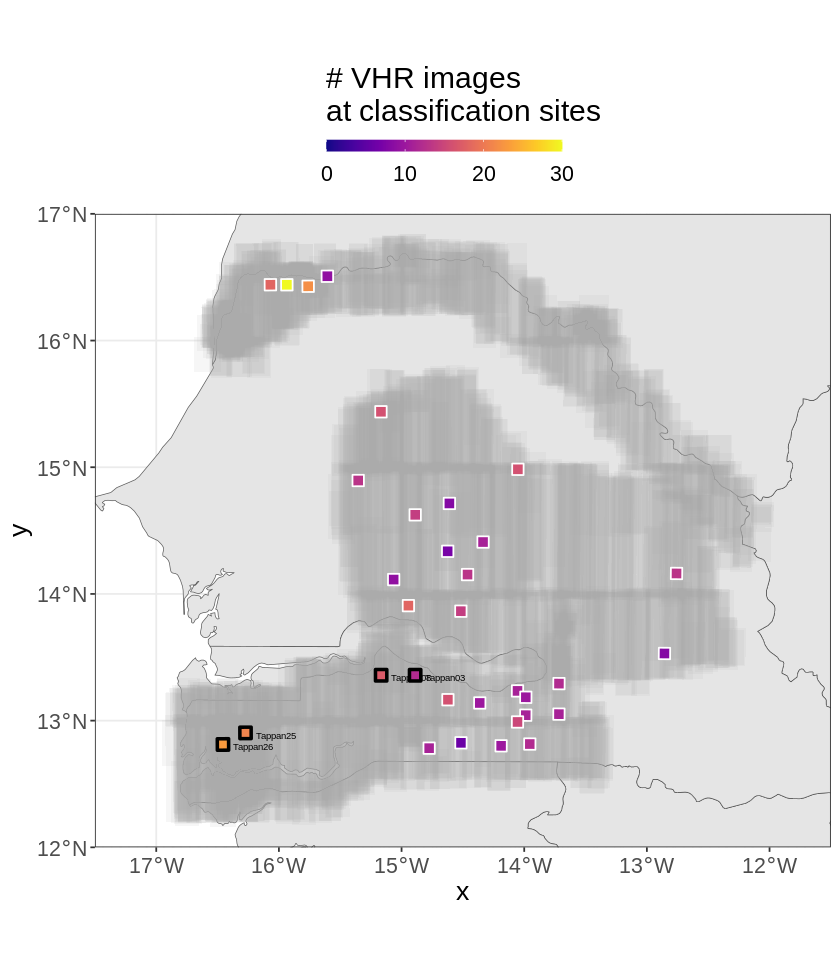

In [145]:
map_vhr + 
geom_sf_text(data=smry_footprint_tappan %>% filter(tappan %in% levels(results$scene_id)), aes(label=tappan), size=2, hjust=-0.25, vjust=1) +
geom_sf(data=smry_footprint_tappan %>% filter(tappan %in% levels(results$scene_id)), aes(fill=cnt_vhr), color='black', lwd=1.0) + 

coord_sf(xlim = c(-17.5, -11.5), ylim = c(12, 17), expand = FALSE)

In [35]:
levels(results$aggregated_class_type_time1)

[1] "cropland"         "other"            "other_vegetation" "trees/shrub"

In [36]:
levels(results$aggregated_class_type_time1) = c('cropland', 'other', 'other', 'trees/shrubs')

In [38]:
smry = results %>% dplyr::group_by(scene_id, aggregated_class_type_time1, date_diff, change_accuracy) %>%
    dplyr::summarize(n_acc = n())
smry = results %>% dplyr::group_by(scene, aggregated_class_type_time1, change_accuracy, change_reference) %>%
    dplyr::summarize(n_acc = n())
smry

`summarise()` has grouped output by 'scene_id', 'aggregated_class_type_time1',
'date_diff'. You can override using the `.groups` argument.`summarise()` has grouped output by 'scene', 'aggregated_class_type_time1',
'change_accuracy'. You can override using the `.groups` argument.

scene,aggregated_class_type_time1,change_accuracy,change_reference,n_acc
SR[VHR],cropland,NA,change,22
SR[VHR],cropland,NA,no change,127
SR[VHR],other,NA,change,47
SR[VHR],other,NA,no change,53
SR[VHR],trees/shrubs,NA,change,52
SR[VHR],trees/shrubs,NA,no change,395
TOA[VHR],cropland,classification error,change,6
TOA[VHR],cropland,classification error,no change,43
TOA[VHR],cropland,success,change,15
TOA[VHR],cropland,success,no change,84


In [30]:
head(results, 2)

Latitude,Longitude,scene_id,year_time1,month_time1,day_time1,short_filename_time1,year_time2,month_time2,day_time2,...,scene,geom,time1_accuracy,time2_accuracy,change_reference,change_spaceborne,change_accuracy,date_t2,date_t1,date_diff
13.40344,-15.17809,Tappan08,2011,1,16,Tappan08_WV02_20110116_M1BS_10300100084E6A00_data,2019,11,14,...,SR[VHR],"POLYGON ((480722.8 1481762,...",NA,NA,no change,NA,NA,2019-11-14 12:00:00,2011-01-16 12:00:00,3224 days
13.40123,-15.18933,Tappan08,2011,1,16,Tappan08_WV02_20110116_M1BS_10300100084E6A00_data,2017,2,25,...,SR[VHR],"POLYGON ((479505.6 1481519,...",NA,NA,no change,NA,NA,2017-02-25 12:00:00,2011-01-16 12:00:00,2232 days


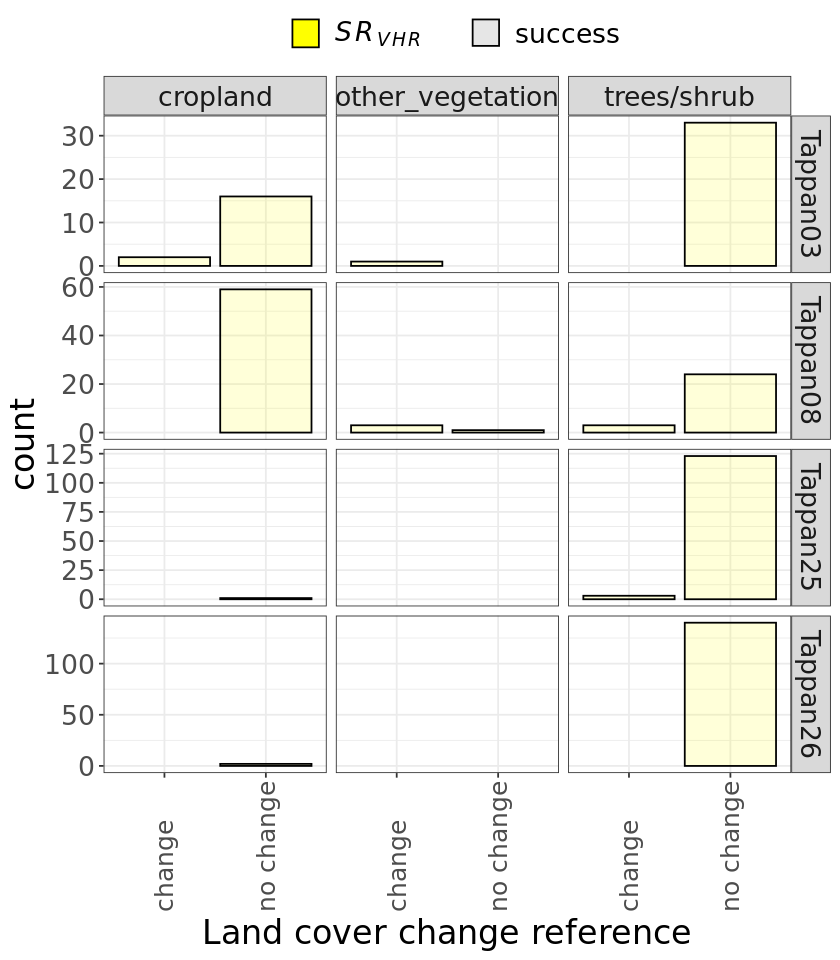

In [29]:
options(repr.plot.height = 8, repr.plot.width =7, warn=-1)

results %>% #drop_na() %>%
    #filter(type == 'crop' | type == 'tree') %>%
    filter((time1_accuracy == 'success') & (time2_accuracy == 'success') ) %>%
    filter(scene != 'SR[reference]' ) %>%
    #filter(aggregated_class_type_time1 != 'other' ) %>%
    droplevels() %>%
    ggplot(aes(x=change_reference, fill=scene, alpha=change_accuracy))+
            scale_fill_manual(values=c('yellow','cornflowerblue'), name=NULL, labels=scene_labels[2:3]) +
            scale_alpha_manual(values=c(0.15, 1), name=NULL) +
            #geom_violin() +
            geom_bar(position = "dodge", color='black') +
            facet_grid(scene_id~aggregated_class_type_time1,  scales='free_y') +
            #coord_cartesian(ylim=c(0,100)) +
            theme_bw() +
            theme(text=element_text(size=20), 
                  axis.text.x=element_text(size=15, angle=90 ,hjust=0,vjust=0.5),
                 legend.text.align = 0, 
                 legend.position="top",
          legend.title = element_text(size=18),
          legend.background = element_rect(color='white') ) +
            # guides(fill=guide_legend(title.position = "top", label.position = "bottom", legend.position='horizontal'
            #                          ,keywidth = unit(.125, "cm"), keyheight = unit(1, "cm")
            #                         )
            #       ) +
            labs(x='Land cover change reference')